In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the dataset
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [3]:
# Replacing and rempapping the column values for train and test dataframes
train['Gender'] = train['Gender'].fillna( train['Gender'].dropna().mode().values[0] )
train['Married'] = train['Married'].fillna( train['Married'].dropna().mode().values[0] )
train['Dependents'] = train['Dependents'].fillna( train['Dependents'].dropna().mode().values[0] )
train['Self_Employed'] = train['Self_Employed'].fillna( train['Self_Employed'].dropna().mode().values[0] )
train['LoanAmount'] = train['LoanAmount'].fillna( train['LoanAmount'].dropna().mean() )
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna( train['Loan_Amount_Term'].dropna().mode().values[0] )
train['Credit_History'] = train['Credit_History'].fillna( train['Credit_History'].dropna().mode().values[0] ).astype(np.int)
train['Dependents'] = train['Dependents'].str.rstrip('+')
train['Gender'] = train['Gender'].map({'Female':0,'Male':1}).astype(np.int)
train['Married'] = train['Married'].map({'No':0, 'Yes':1}).astype(np.int)
train['Education'] = train['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
train['Self_Employed'] = train['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
train['Loan_Status'] = train['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
train['Dependents'] = train['Dependents'].astype(np.int)

In [4]:
test['Gender'] = test['Gender'].fillna( test['Gender'].dropna().mode().values[0] )
test['Married'] = test['Married'].fillna( test['Married'].dropna().mode().values[0] )
test['Dependents'] = test['Dependents'].fillna( test['Dependents'].dropna().mode().values[0] )
test['Self_Employed'] = test['Self_Employed'].fillna( test['Self_Employed'].dropna().mode().values[0] )
test['LoanAmount'] = test['LoanAmount'].fillna( test['LoanAmount'].dropna().mean() )
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna( test['Loan_Amount_Term'].dropna().mode().values[0] )
test['Credit_History'] = test['Credit_History'].fillna( test['Credit_History'].dropna().mode().values[0] ).astype(np.int)
test['Dependents'] = test['Dependents'].str.rstrip('+')
test['Gender'] = test['Gender'].map({'Female':0,'Male':1}).astype(np.int)
test['Married'] = test['Married'].map({'No':0, 'Yes':1}).astype(np.int)
test['Education'] = test['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
test['Self_Employed'] = test['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
test['Dependents'] = test['Dependents'].astype(np.int)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


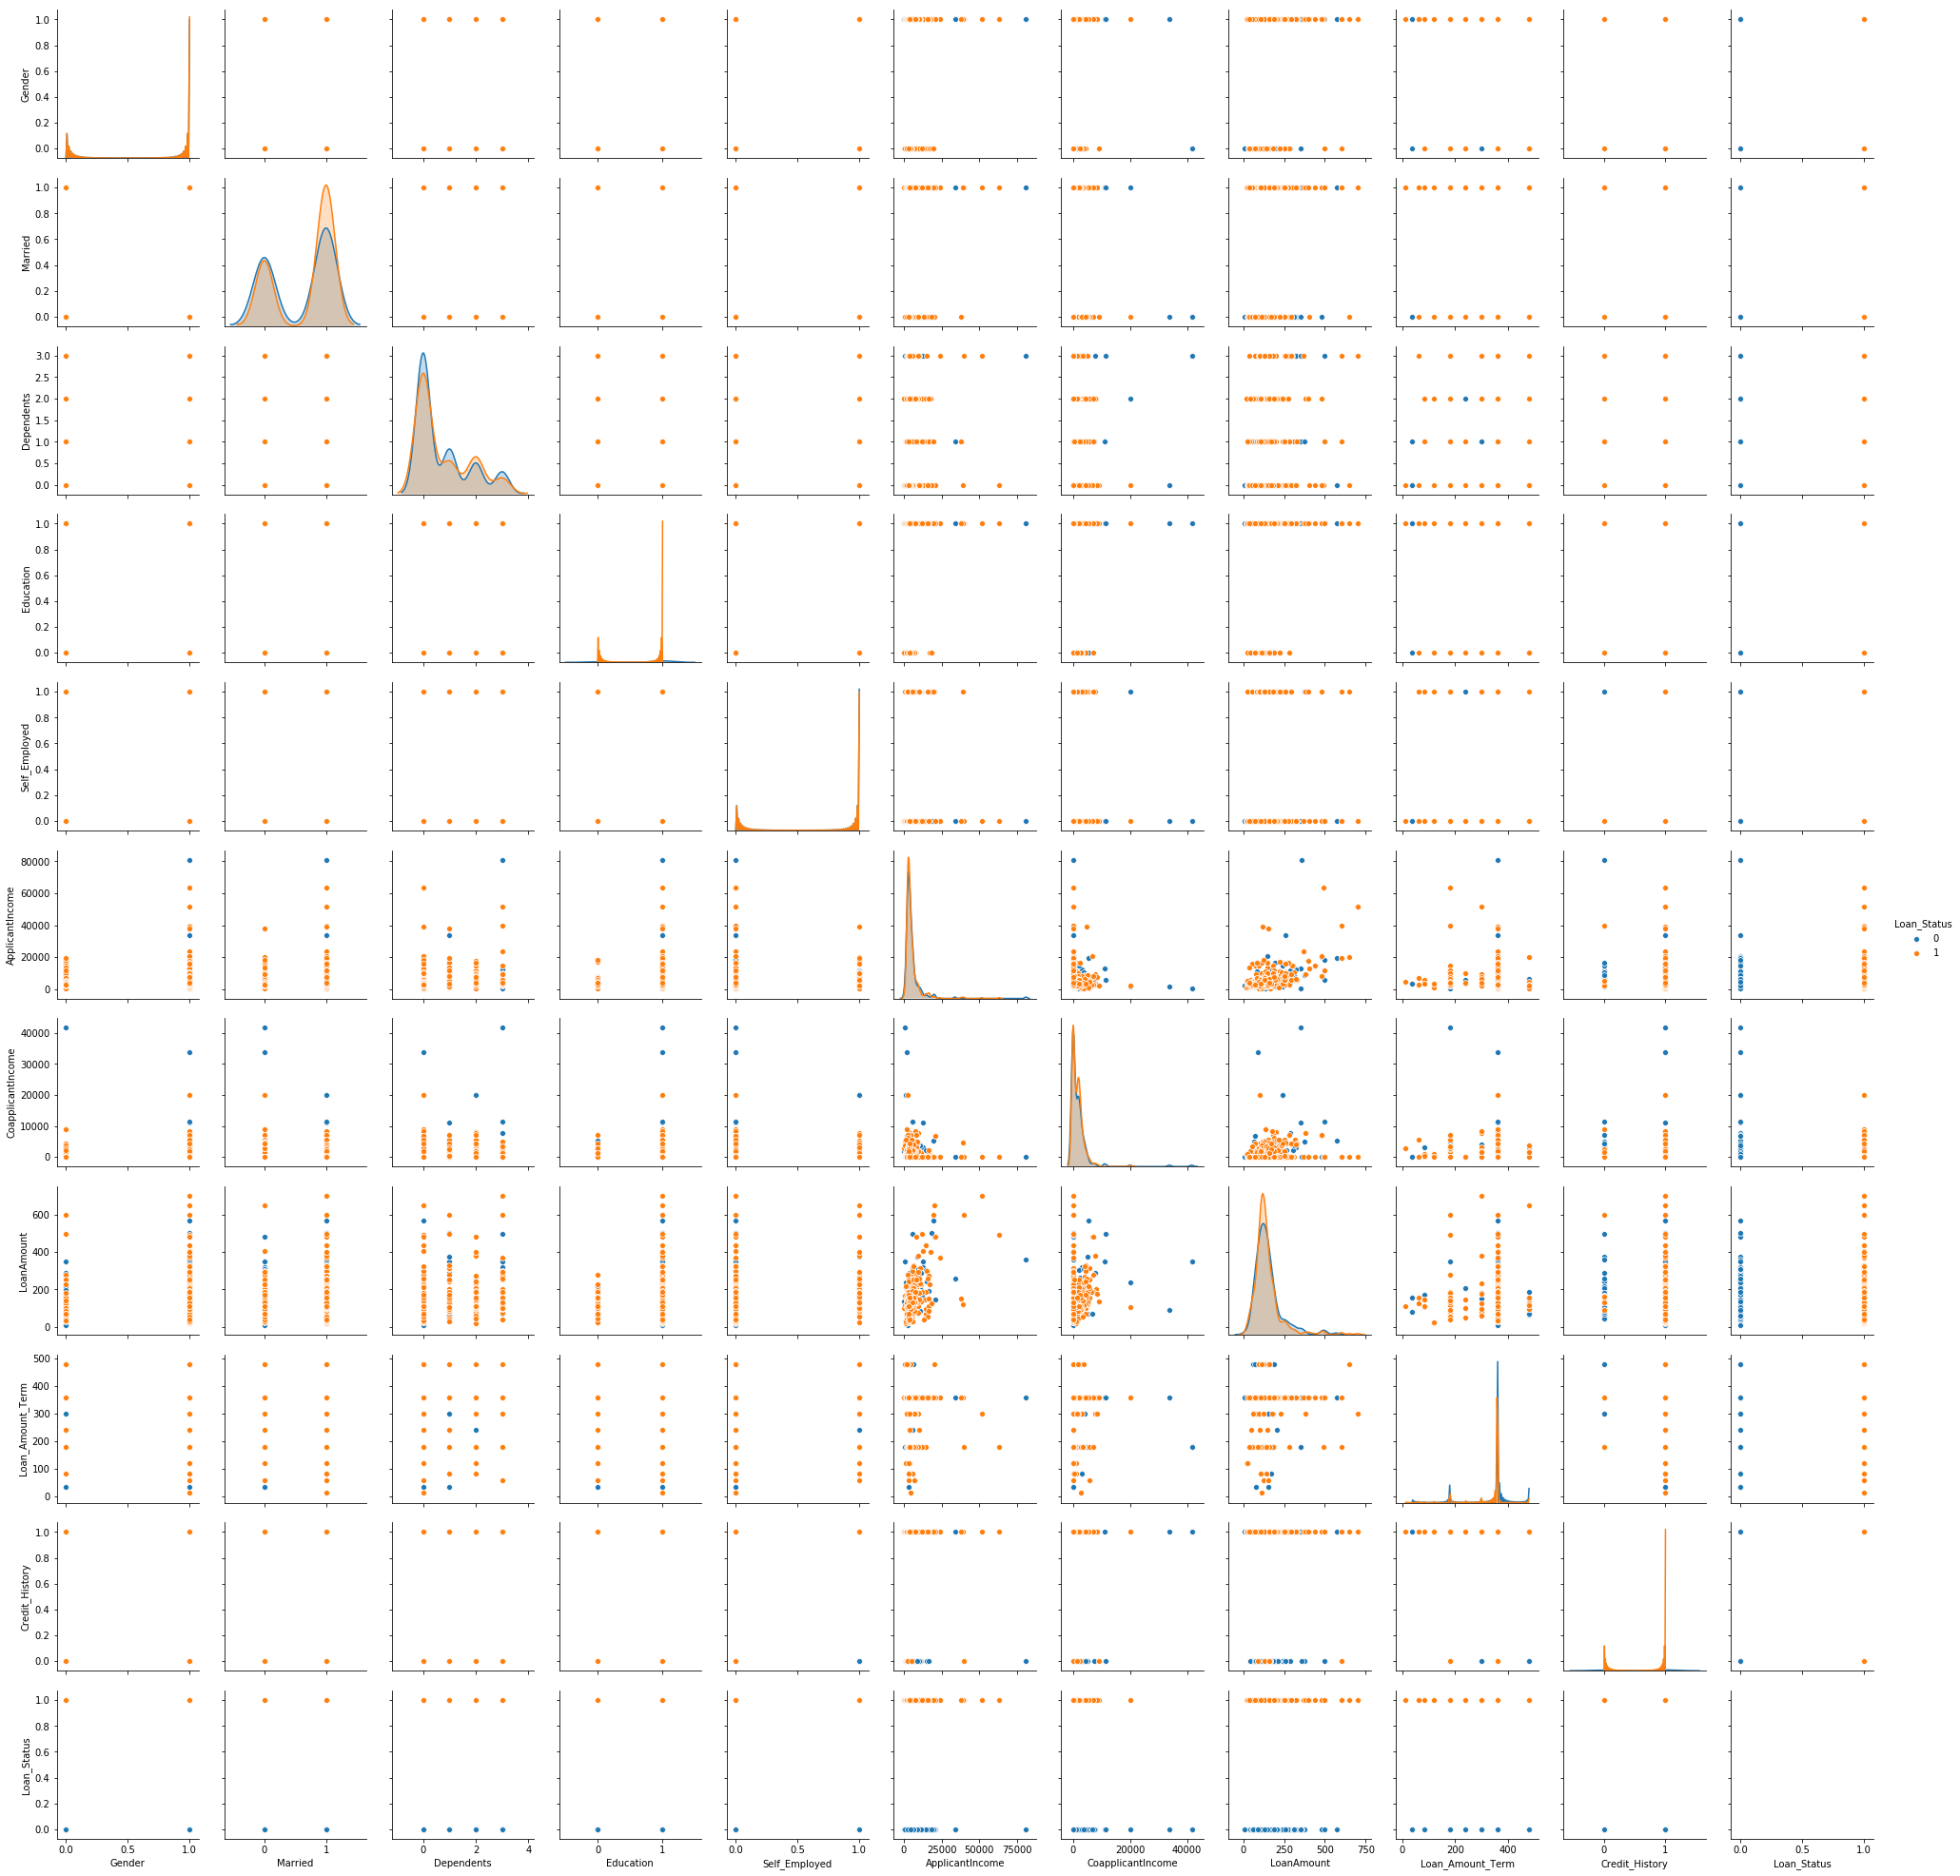

In [28]:
sns.pairplot(train, hue='Loan_Status')

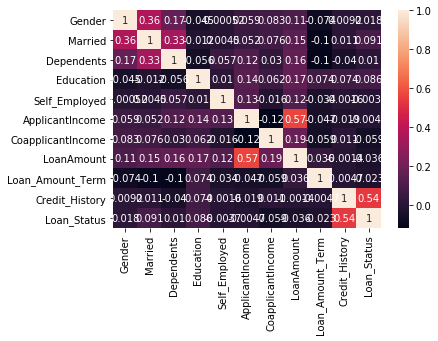

In [29]:
sns.heatmap(train.corr(),annot=True)

In [5]:
X = train.iloc[:,1:-1]
y = train.iloc[:,-1]
X_cv = test.iloc[:,1:]

In [6]:
# Spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Dummy varibales removal
X_train = pd.get_dummies(X_train)
X_cv = pd.get_dummies(X_cv)
X_test = pd.get_dummies(X_test)

In [8]:
# feature scaling
from  sklearn.preprocessing  import StandardScaler

slc= StandardScaler()
X_train = slc.fit_transform(X_train)
X_cv = slc.transform(X_cv)
X_test = slc.transform(X_test)

In [9]:
# model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators =500, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree,n_estimators=500, learning_rate=0.1, random_state=0)

In [12]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('forest', forest), ('xgb', xgb1), ('adaboost', ada)], voting='hard')

In [13]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
           ...None,
            splitter='best'),
          learning_rate=0.1, n_estimators=500, random_state=0))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [14]:
y_pred = eclf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.65      0.45      0.54        33
          1       0.82      0.91      0.86        90

avg / total       0.77      0.79      0.78       123



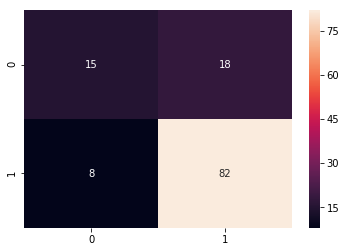

In [16]:
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [30]:
param_grid = {'forest__criterion':['entropy'], 'forest__n_estimators':[1000, 3000, 5000],
              'xgb__n_estimators':[5000, 10000, 15000], 'xgb__gamma':[1],
              'adaboost__n_estimators':[1000,5000], 'adaboost__learning_rate':[0.1,0.5,1.0]
             } 


from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(eclf,param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7987804878048781, total=   3.4s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7378048780487805, total=   3.4s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7852760736196319, total=   3.1s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7987804878048781, total=   4.1s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7439024390243902, total=   4.0s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7914110429447853, total=   4.0s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7987804878048781, total=   5.0s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7439024390243902, total=   4.8s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7914110429447853, total=   4.7s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7987804878048781, total=   5.5s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7378048780487805, total=   5.4s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7852760736196319, total=   5.5s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7987804878048781, total=   6.3s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7439024390243902, total=   6.2s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7914110429447853, total=   6.2s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7987804878048781, total=   7.4s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7439024390243902, total=   7.4s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7914110429447853, total=   7.5s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7987804878048781, total=   7.9s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7378048780487805, total=   7.8s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7852760736196319, total=   7.9s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7987804878048781, total=   8.5s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7439024390243902, total=   9.2s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7914110429447853, total=   8.7s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7987804878048781, total=   9.5s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7439024390243902, total=  11.3s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7914110429447853, total=   9.4s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.8048780487804879, total=   7.5s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7439024390243902, total=   7.8s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7914110429447853, total=   7.6s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.8048780487804879, total=   8.5s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7378048780487805, total=   8.2s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7975460122699386, total=   8.5s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.8048780487804879, total=   9.2s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7439024390243902, total=   8.8s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7975460122699386, total=   9.3s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.8048780487804879, total=   9.5s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7439024390243902, total=   9.4s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7914110429447853, total=   9.5s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.8048780487804879, total=  10.3s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7378048780487805, total=  10.3s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7975460122699386, total=  10.7s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.8048780487804879, total=  12.8s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7439024390243902, total=  11.3s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7975460122699386, total=  11.7s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.8048780487804879, total=  12.5s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7439024390243902, total=  12.6s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7852760736196319, total=  12.2s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.8048780487804879, total=  13.3s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7378048780487805, total=  13.2s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7914110429447853, total=  13.2s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.8048780487804879, total=  13.7s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7439024390243902, total=  14.3s
[CV] adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.1, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7914110429447853, total=  13.5s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.8048780487804879, total=   3.3s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7378048780487805, total=   3.1s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7975460122699386, total=   3.0s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.8048780487804879, total=   3.9s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7317073170731707, total=   3.8s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.803680981595092, total=   3.9s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.8048780487804879, total=   4.7s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7378048780487805, total=   4.7s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.803680981595092, total=   4.6s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.8048780487804879, total=   5.5s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7378048780487805, total=   5.3s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7975460122699386, total=   5.5s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.8048780487804879, total=   6.4s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7317073170731707, total=   6.1s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.803680981595092, total=   7.5s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.8048780487804879, total=   8.1s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7378048780487805, total=   7.1s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.803680981595092, total=   7.0s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.8048780487804879, total=   7.7s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7378048780487805, total=   7.6s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7914110429447853, total=   7.8s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.8048780487804879, total=   8.5s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7317073170731707, total=   8.4s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7975460122699386, total=   8.7s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.8048780487804879, total=   9.5s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7378048780487805, total=   9.2s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7975460122699386, total=   9.5s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.8048780487804879, total=   7.2s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7317073170731707, total=   7.2s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7975460122699386, total=   7.1s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.8048780487804879, total=   8.2s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7317073170731707, total=   7.9s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.803680981595092, total=   7.9s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7987804878048781, total=   8.9s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7317073170731707, total=   8.7s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.803680981595092, total=   8.9s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.8048780487804879, total=   9.5s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7317073170731707, total=   9.4s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7975460122699386, total=   9.5s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.8048780487804879, total=  10.3s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7317073170731707, total=  10.3s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.803680981595092, total=  10.2s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7987804878048781, total=  11.2s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7317073170731707, total=  11.0s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.803680981595092, total=  11.0s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.8048780487804879, total=  12.2s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7317073170731707, total=  12.2s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7975460122699386, total=  12.1s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.8048780487804879, total=  13.0s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7317073170731707, total=  12.9s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.803680981595092, total=  13.0s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7987804878048781, total=  13.9s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7317073170731707, total=  13.7s
[CV] adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=0.5, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.803680981595092, total=  13.9s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.8048780487804879, total=   3.3s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.725609756097561, total=   3.1s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7975460122699386, total=   3.2s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.8048780487804879, total=   4.1s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7317073170731707, total=   4.0s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.803680981595092, total=   3.9s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7987804878048781, total=   4.8s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7317073170731707, total=   4.9s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.803680981595092, total=   4.8s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.8048780487804879, total=   5.4s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.725609756097561, total=   5.5s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7975460122699386, total=   5.7s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.8048780487804879, total=   6.3s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7317073170731707, total=   6.4s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.803680981595092, total=   6.4s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7987804878048781, total=   7.1s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7317073170731707, total=   7.3s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.803680981595092, total=   7.3s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.8048780487804879, total=   7.8s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.725609756097561, total=   8.1s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7975460122699386, total=   7.8s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.8048780487804879, total=   8.7s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7317073170731707, total=   8.8s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.803680981595092, total=   8.7s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7987804878048781, total=   9.7s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7317073170731707, total=   9.6s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=1000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.803680981595092, total=  10.4s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7987804878048781, total=   7.2s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.725609756097561, total=   7.2s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7914110429447853, total=   7.2s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7987804878048781, total=   7.9s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7317073170731707, total=   8.1s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7975460122699386, total=   8.0s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7926829268292683, total=   8.9s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7317073170731707, total=   8.9s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=1000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7975460122699386, total=   8.7s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7987804878048781, total=   9.5s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.725609756097561, total=   9.5s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7914110429447853, total=   9.5s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7987804878048781, total=  10.4s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7317073170731707, total=  10.4s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7975460122699386, total=  10.2s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7926829268292683, total=  11.3s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7317073170731707, total=  11.1s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=3000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7975460122699386, total=  11.4s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7987804878048781, total=  11.8s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.725609756097561, total=  11.8s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=5000, score=0.7914110429447853, total=  12.2s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7987804878048781, total=  13.3s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7317073170731707, total=  13.0s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=10000, score=0.7975460122699386, total=  12.7s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7926829268292683, total=  13.5s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7317073170731707, total=  13.5s
[CV] adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV]  adaboost__learning_rate=1.0, adaboost__n_estimators=5000, forest__criterion=entropy, forest__n_estimators=5000, xgb__gamma=1, xgb__n_estimators=15000, score=0.7975460122699386, total=  13.5s


GridSearchCV(cv=None, error_score='raise',
       estimator=VotingClassifier(estimators=[('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_s...tors=500, random_state=0))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'forest__criterion': ['entropy'], 'forest__n_estimators': [1000, 3000, 5000], 'xgb__n_estimators': [5000, 10000, 15000], 'xgb__gamma': [1], 'adaboost__n_estimators': [1000, 5000], 'adaboost__learning_rate': [0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [31]:
grid.best_params_

{'adaboost__learning_rate': 0.1,
 'adaboost__n_estimators': 5000,
 'forest__criterion': 'entropy',
 'forest__n_estimators': 1000,
 'xgb__gamma': 1,
 'xgb__n_estimators': 15000}

In [32]:
grid.best_estimator_

VotingClassifier(estimators=[('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
           ...one,
            splitter='best'),
          learning_rate=0.1, n_estimators=5000, random_state=0))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [33]:
grid_predictions = grid.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.76      0.48      0.59        33
          1       0.83      0.94      0.89        90

avg / total       0.81      0.82      0.81       123



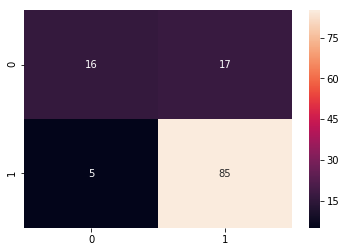

In [34]:
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

In [35]:
final_predictions = grid.predict(X_cv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [36]:
test["Loan_status"] = final_predictions

In [37]:
test["Loan_Status"] = test['Loan_status'].map({0:'N', 1:'Y'})

In [38]:
final = test.loc[:,['Loan_ID','Loan_Status']]

In [39]:
final.to_csv("my_submission3.csv")